방 크기 :  11.3 m X  9.08 m
left 벽의 창문 :  []
top 벽의 창문 :  [0.95, 1.56, 2.45, 3.29, 4.15, 5.08, 6.11, 7.17, 8.08, 9.32]
right 벽의 창문 :  [1.11]
bottom 벽의 창문 :  [1.79, 9.72] 

빈 파일이 C:\Users\badag\PJ_Algorithm\base_model\input_simulator.txt에 성공적으로 생성되었습니다.
빈 파일이 C:\Users\badag\PJ_Algorithm\base_model\input_modeling.txt에 성공적으로 생성되었습니다.
left 벽의 창문 :  []
top 벽의 창문 :  [(0.95, 3.29, 6.11, 9.32), (0.95, 3.29, 7.17, 9.32), (0.95, 4.15, 7.17, 9.32), (0.95, 5.08, 7.17, 9.32), (1.56, 4.15, 7.17, 9.32), (1.56, 5.08, 7.17, 9.32), (2.45, 5.08, 7.17, 9.32)]
right 벽의 창문 :  [[1.11]]
bottom 벽의 창문 :  [[1.79, 9.72]] 

left 벽의 창문 :  []
top 벽의 창문 :  [(0.95, 3.29, 6.11, 9.32), (1.56, 4.15, 7.17, 9.32), (2.45, 5.08, 7.17, 9.32)]
right 벽의 창문 :  [[1.11]]
bottom 벽의 창문 :  [[1.79, 9.72]] 

[]
[0.95, 3.29, 6.11, 9.32]
[1.11]
[1.79, 9.72]

모든 창문 모음 :  [0.95, 3.29, 6.11, 9.32, 1.11, 1.79, 9.72] 

Filtered left combinations: []
left 창문의 개수 :  0
Filtered top combinations: [(0.95, 3.29, 6.11, 9.32), (1.56, 4.15, 7.17, 9.32), 

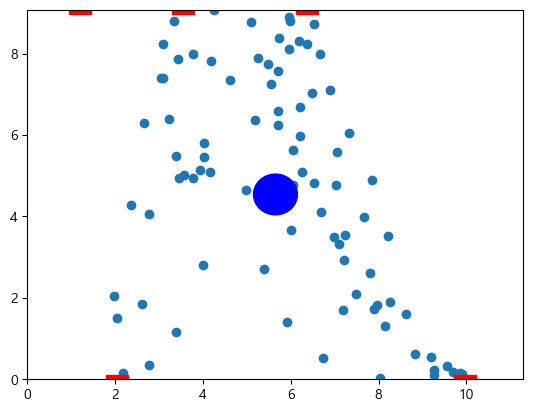

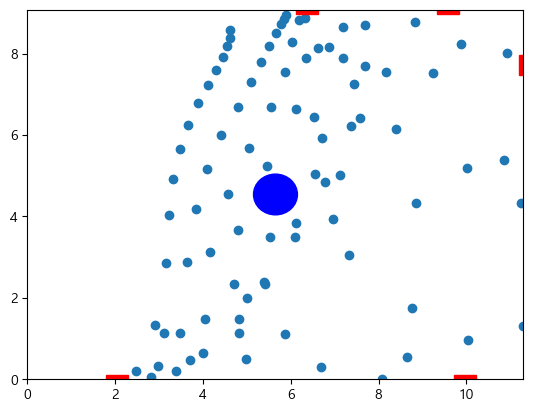

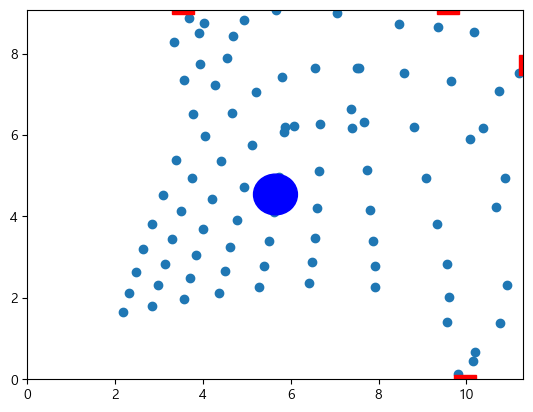

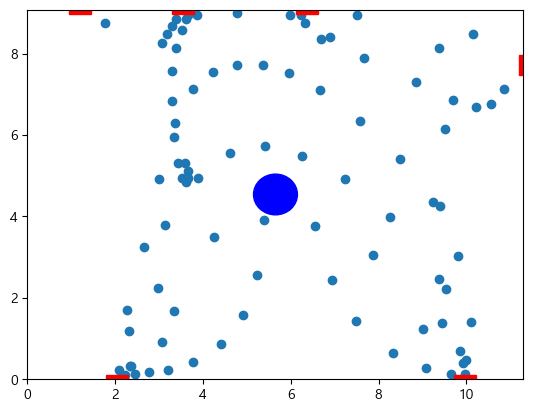

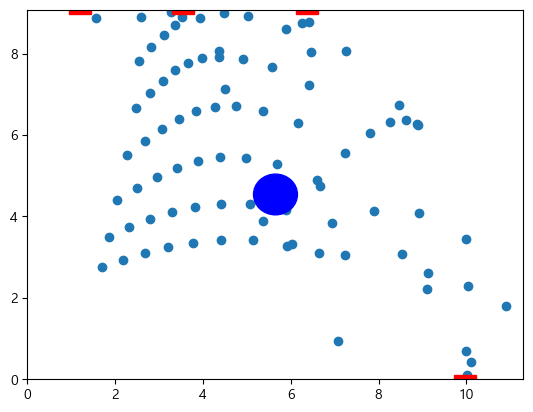

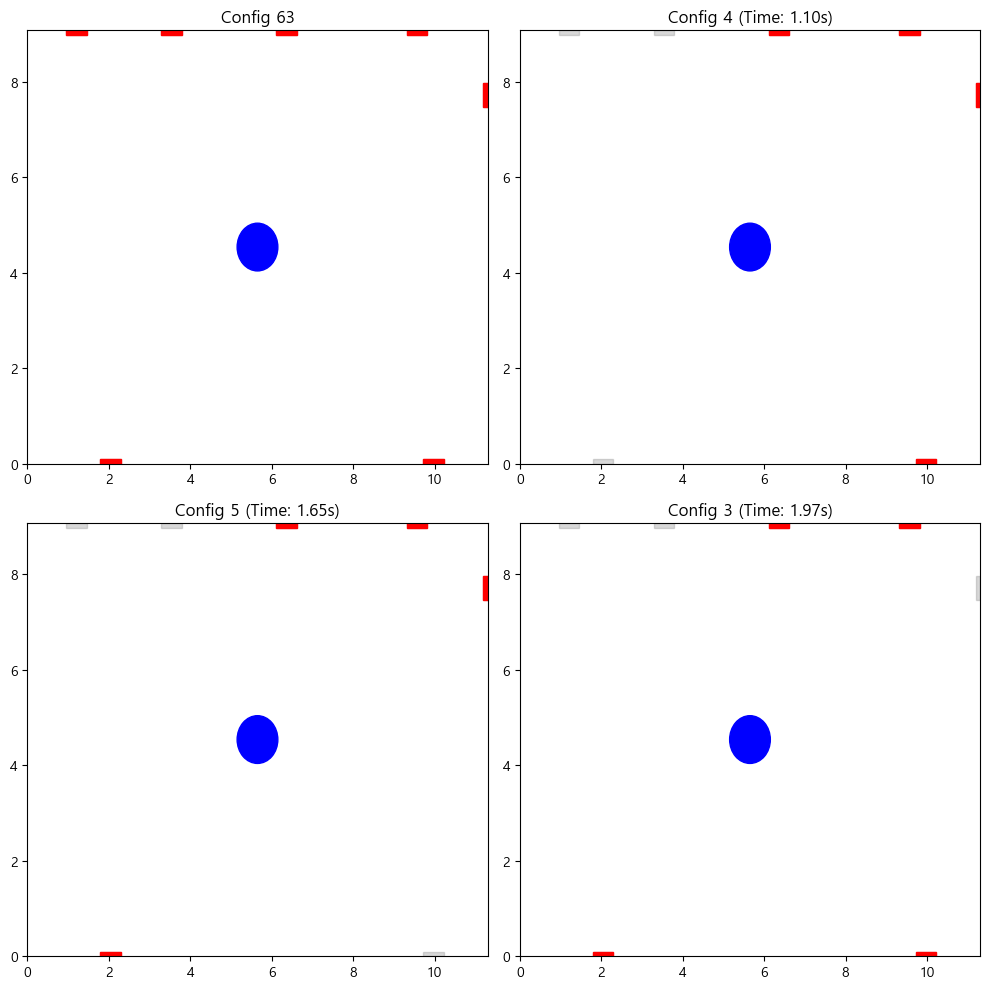

[{'left': [], 'top': [0.95, 3.29, 6.11, 9.32], 'right': [1.11], 'bottom': [1.79, 9.72]}, {'left': [], 'top': [6.11, 9.32], 'right': [1.11], 'bottom': [9.72]}, {'left': [], 'top': [6.11, 9.32], 'right': [1.11], 'bottom': [1.79]}, {'left': [], 'top': [6.11, 9.32], 'right': [], 'bottom': [1.79, 9.72]}]
상위 창문 조합 : 

Window configuration 1:
{'left': [], 'top': [0.95, 3.29, 6.11, 9.32], 'right': [1.11], 'bottom': [1.79, 9.72]}
[]
[0.95, 3.29, 6.11, 9.32]
[1.11]
[1.79, 9.72]
Left windows: [0, 0, 0, 0]
Top windows: [1, 1, 1, 1]
Right windows: [1, 0, 0, 0]
Bottom windows: [1, 1, 0, 0]
창문 상태가 C:\Users\badag\PJ_Algorithm\base_model\input_simulator.txt에 성공적으로 작성되었습니다.

Window configuration 2:
{'left': [], 'top': [6.11, 9.32], 'right': [1.11], 'bottom': [9.72]}
[]
[0.95, 3.29, 6.11, 9.32]
[1.11]
[1.79, 9.72]
Left windows: [0, 0, 0, 0]
Top windows: [0, 0, 1, 1]
Right windows: [1, 0, 0, 0]
Bottom windows: [0, 1, 0, 0]
창문 상태가 C:\Users\badag\PJ_Algorithm\base_model\input_simulator.txt에 성공적으로 작성되었습니다.



In [7]:
import numpy as np
import pandas as pd
import os
import random
import time
import itertools
import tkinter as tk
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import sys

def run_simulation2(room_Z, room_X, windows, window_attraction_strength, window_length, num_particles, ac_repulsion_strength, animation_interval, animation_ON=True):
    threshold_particles = num_particles * 0.1  # 종료 기준 입자 수(%)

    # 입자의 초기 위치를 균일하게 배치
    # x축 방향으로 균일하게 배치될 위치 생성
    x_positions = np.linspace(0, room_Z, int(np.sqrt(num_particles)))
    # y축 방향으로 균일하게 배치될 위치 생성
    y_positions = np.linspace(0, room_X, int(np.sqrt(num_particles)))
    # x와 y 위치 배열을 그리드 형태로 결합하여 모든 조합을 생성
    positions = np.array(np.meshgrid(x_positions, y_positions)).T.reshape(-1, 2)

    # 입자의 초기 속도는 정지 상태로 설정
    velocities = np.zeros((num_particles, 2))

    # 에어컨의 위치는 방의 가운데로 설정
    ac_position = np.array([room_Z / 2, room_X / 2])

    if animation_ON:
        # 새로운 tkinter 윈도우 생성
        root = tk.Tk()
        root.title("Particle Simulation")

        # matplotlib Figure 및 Axes 생성
        fig, ax = plt.subplots()
        ax.set_xlim(0, room_Z)
        ax.set_ylim(0, room_X)
        scat = ax.scatter(positions[:, 0], positions[:, 1])

        # 창문 그리기
        for side, coords in windows.items():
            for coord in coords:
                if side == 'left':
                    rect = plt.Rectangle((coord[0], coord[1]), 0.1, window_length, color='red')  # 세로 직사각형
                elif side == 'top':
                    rect = plt.Rectangle((coord[0], coord[1] - 0.1), window_length, 0.1, color='red')  # 가로 직사각형
                elif side == 'right':
                    rect = plt.Rectangle((coord[0] - 0.1, room_X - coord[1] - window_length), 0.1, window_length, color='red')  # 세로 직사각형
                elif side == 'bottom':
                    rect = plt.Rectangle((coord[0], coord[1]), window_length, 0.1, color='red')  # 가로 직사각형
                ax.add_patch(rect)

        # 에어컨 위치 표시
        ac_rect = plt.Circle(ac_position, 0.5, color='blue')
        ax.add_patch(ac_rect)

        # Figure를 tkinter 캔버스에 배치
        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)

        start_time = time.time()  # 시뮬레이션 시작 시간 기록
        simulation_ended = False  # 시뮬레이션 종료 플래그
    
        def update(frame):
            nonlocal positions, velocities, simulation_ended
            
            if simulation_ended:
                return scat,

            try:
                # 에어컨의 위치에서 입자를 밀어내는 힘 계산 및 적용
                # 입자 위치에서 에어컨 위치까지의 방향 벡터 계산
                ac_directions = positions - ac_position
                # 입자 위치에서 에어컨 위치까지의 거리 계산
                ac_distances = np.linalg.norm(ac_directions, axis=1).reshape(-1, 1)
                # 방향 벡터를 정규화 (단위 벡터로 만듦)
                ac_directions = np.divide(ac_directions, ac_distances, out=np.zeros_like(ac_directions), where=ac_distances != 0)
                # 에어컨에서 입자를 밀어내는 힘 계산 (거리에 반비례하는 힘)
                repulsion_force = ac_repulsion_strength * ac_directions / (ac_distances ** 2)
                # 입자들의 속도에 밀어내는 힘 적용
                velocities += repulsion_force

                # 창문의 위치에서 입자를 끌어당기는 힘 계산 및 적용
                for side, coords in windows.items():
                    # 창문의 중심 좌표 계산
                    for coord in coords:
                        # 왼쪽 창문의 중심 좌표 (x, y)
                        if side == 'left':
                            window_center = [coord[0] + 0.05, coord[1] + window_length / 2]
                        # 오른쪽 창문의 중심 좌표 (x, y)
                        elif side == 'right':
                            window_center = [coord[0] + 0.05, room_X - (coord[1] + window_length / 2)]
                        # 위쪽 또는 아래쪽 창문의 중심 좌표 (x, y)
                        else:
                            window_center = [coord[0] + window_length / 2, coord[1] + 0.05]
                        # 입자들에서 창문 중심까지의 방향 벡터 계산
                        window_directions = window_center - positions
                        # 입자들에서 창문 중심까지의 거리 계산
                        window_distances = np.linalg.norm(window_directions, axis=1).reshape(-1, 1)
                        # 방향 벡터를 정규화 (단위 벡터로 만듦)
                        window_directions = np.divide(window_directions, window_distances, out=np.zeros_like(window_directions), where=window_distances != 0)
                        
                        # (1)거리에 반비례하는 힘 계산
                        # attraction_force = window_attraction_strength * window_directions / (window_distances ** 2)  # 끌어당기는 힘             
                        # velocities += attraction_force # 입자들의 속도에 끌어당기는 힘 적용

                        # (2)가우시안 분포를 사용한 힘 계산
                        # sigma = 1.0  # 표준편차, 필요한 경우 조정
                        # gaussian_force = window_attraction_strength * np.exp(- (window_distances ** 2) / (2 * sigma ** 2))
                        # gaussian_force = gaussian_force * window_directions
                        # velocities += gaussian_force

                        # (3)감쇠된 역제곱 법칙을(3) 사용한 힘 계산
                        damping_factor = 0.2  # 감쇠 요소, 클수록 힘이 가파르게 감소함
                        attraction_force = window_attraction_strength * np.exp(-damping_factor * window_distances) * window_directions / (window_distances ** 2)
                        velocities += attraction_force
                        
                # 속도 제한 적용
                max_velocity = 0.1
                speed = np.linalg.norm(velocities, axis=1).reshape(-1, 1)
                velocities = np.where(speed > max_velocity, velocities * max_velocity / speed, velocities)

                # 입자의 위치를 업데이트
                positions += velocities

                # 경계에 도달하면 속도의 방향을 반대로 변경
                # 입자들의 x축 위치가 0보다 작거나 방의 너비 room_Z보다 큰 경우 True로 표기
                mask_x = (positions[:, 0] < 0) | (positions[:, 0] > room_Z)
                # mask_x가 True인 입자들의 x축 속도를 반대로 변경
                velocities[mask_x, 0] *= -1
                # mask_x가 True인 입자들의 x축 위치를 0과 room_Z 사이로 조정
                positions[mask_x, 0] = np.clip(positions[mask_x, 0], 0, room_Z)

                # 입자들의 y축 위치가 0보다 작거나 방의 높이 room_X보다 큰 경우
                mask_y = (positions[:, 1] < 0) | (positions[:, 1] > room_X)
                # mask_y가 True인 입자들의 y축 속도를 반대로 변경
                velocities[mask_y, 1] *= -1
                # mask_y가 True인 입자들의 y축 위치를 0과 room_X 사이로 조정
                positions[mask_y, 1] = np.clip(positions[mask_y, 1], 0, room_X)

                # 창문에 닿으면 입자를 제거
                for side, coords in windows.items(): 
                    for coord in coords: 
                        if side == 'left':
                            mask_window = (positions[:, 0] <= coord[0] + 0.1) & (positions[:, 1] >= coord[1]) & (positions[:, 1] <= coord[1] + window_length)
                        elif side == 'top':
                            mask_window = (positions[:, 1] >= coord[1] - 0.1) & (positions[:, 0] >= coord[0]) & (positions[:, 0] <= coord[0] + window_length)
                        elif side == 'right':
                            mask_window = (positions[:, 0] >= coord[0] - 0.1) & (positions[:, 1] >= room_X - coord[1] - window_length) & (positions[:, 1] <= room_X - coord[1])
                        elif side == 'bottom':
                            mask_window = (positions[:, 1] <= coord[1] + 0.1) & (positions[:, 0] >= coord[0]) & (positions[:, 0] <= coord[0] + window_length)
                        if np.any(mask_window): # 창문 근처 범위에 들어가면 True로 표기
                            # True로 표기된 입자를 삭제하고 False인 입자만 슬라이싱해서 입자를 처리
                            positions = positions[~mask_window] 
                            velocities = velocities[~mask_window]

                # 업데이트된 위치로 점의 데이터 설정
                scat.set_offsets(positions)

                # 입자의 개수가 기준치 이하로 떨어지면 시뮬레이션 종료
                if len(positions) <= threshold_particles:
                    elapsed_time = time.time() - start_time
                    print(f"Simulation ended. Elapsed time: {elapsed_time:.2f} seconds")
                    simulation_ended = True
                    root.after(100, root.destroy)  # 100ms 후에 윈도우 닫기

                return scat,

            except Exception:
                if ani.event_source:
                    ani.event_source.stop()
                    root.quit()
                    root.destroy()

        def on_key(event):
            try:
                if event.char == 'q':
                    if ani.event_source:
                        ani.event_source.stop()  # 애니메이션 타이머 이벤트 중지
                        root.quit()
                        root.destroy()
            except Exception:
                if ani.event_source:
                    ani.event_source.stop()
                    root.quit()
                    root.destroy()

        # 애니메이션 설정
        ani = FuncAnimation(fig, update, frames=200, interval=animation_interval, blit=True)

        # 키보드 이벤트 바인딩
        root.bind('<Key>', on_key)

        # tkinter 메인 루프 시작
        root.mainloop()
        

    else:
        start_time = time.time()  # 시뮬레이션 시작 시간 기록

        while len(positions) > threshold_particles:
            # 에어컨의 위치에서 입자를 밀어내는 힘 계산 및 적용
            ac_directions = positions - ac_position
            ac_distances = np.linalg.norm(ac_directions, axis=1).reshape(-1, 1)
            ac_directions = np.divide(ac_directions, ac_distances, out=np.zeros_like(ac_directions), where=ac_distances != 0)
            repulsion_force = ac_repulsion_strength * ac_directions / (ac_distances ** 2)
            velocities += repulsion_force

            # 창문의 위치에서 입자를 끌어당기는 힘 계산 및 적용
            for side, coords in windows.items():
                for coord in coords:
                    if side == 'left':
                        window_center = [coord[0] + 0.05, coord[1] + window_length / 2]
                    elif side == 'right':
                        window_center = [coord[0] + 0.05, room_X - (coord[1] + window_length / 2)]
                    else:
                        window_center = [coord[0] + window_length / 2, coord[1] + 0.05]

                    window_directions = window_center - positions
                    window_distances = np.linalg.norm(window_directions, axis=1).reshape(-1, 1)
                    window_directions = np.divide(window_directions, window_distances, out=np.zeros_like(window_directions), where=window_distances != 0)
                    
                    # 거리에 반비례하는 힘 계산
                    # attraction_force = window_attraction_strength * window_directions / (window_distances ** 2)  # 끌어당기는 힘
                    # velocities += attraction_force
                                        
                    damping_factor = 0.2  # 감쇠 요소, 클수록 힘이 가파르게 감소함
                    attraction_force = window_attraction_strength * np.exp(-damping_factor * window_distances) * window_directions / (window_distances ** 2)
                    velocities += attraction_force
                    


            # 속도 제한 적용 (예: 최대 속도를 1로 설정)
            max_velocity = 0.1
            speed = np.linalg.norm(velocities, axis=1).reshape(-1, 1)
            velocities = np.where(speed > max_velocity, velocities * max_velocity / speed, velocities)

            # 입자의 위치를 업데이트
            positions += velocities

            # 경계에 도달하면 속도의 방향을 반대로
            mask_x = (positions[:, 0] < 0) | (positions[:, 0] > room_Z)
            velocities[mask_x, 0] *= -1
            positions[mask_x, 0] = np.clip(positions[mask_x, 0], 0, room_Z)

            mask_y = (positions[:, 1] < 0) | (positions[:, 1] > room_X)
            velocities[mask_y, 1] *= -1
            positions[mask_y, 1] = np.clip(positions[mask_y, 1], 0, room_X)

            # 창문에 닿으면 입자를 제거
            for side, coords in windows.items():
                for coord in coords:
                    if side == 'left':
                        mask_window = (positions[:, 0] <= coord[0] + 0.1) & (positions[:, 1] >= coord[1]) & (positions[:, 1] <= coord[1] + window_length)
                    elif side == 'top':
                        mask_window = (positions[:, 1] >= coord[1] - 0.1) & (positions[:, 0] >= coord[0]) & (positions[:, 0] <= coord[0] + window_length)
                    elif side == 'right':
                        mask_window = (positions[:, 0] >= coord[0] - 0.1) & (positions[:, 1] >= room_X - coord[1] - window_length) & (positions[:, 1] <= room_X - coord[1])
                    elif side == 'bottom':
                        mask_window = (positions[:, 1] <= coord[1] + 0.1) & (positions[:, 0] >= coord[0]) & (positions[:, 0] <= coord[0] + window_length)
                    if np.any(mask_window):
                        positions = positions[~mask_window]
                        velocities = velocities[~mask_window]

            # 동일한 시간 간격으로 업데이트 수행
            time.sleep(animation_interval / 1000.0)

        elapsed_time = time.time() - start_time
        print(f"Simulation ended. Elapsed time: {elapsed_time:.2f} seconds")
        return elapsed_time
    
# 최소 거리 조건을 만족하는 창문 조합 필터링 함수
def filter_window_combinations(window_positions, min_distance=2, max_windows=4):
    # 창문 위치가 없으면 빈 리스트를 반환
    if len(window_positions) == 0:
        return []
    
    # 창문 위치의 개수가 최대 창문 개수보다 적으면 그대로 반환
    if len(window_positions) <= max_windows:
        return [window_positions]
    
    # 유효한 조합을 저장할 리스트
    valid_combinations = []
    
    # 가능한 모든 창문 조합을 생성 (최대 max_windows 개의 창문 선택)
    for combination in itertools.combinations(window_positions, max_windows):
        valid = True # 현재 조합이 유효한지 여부를 나타내는 플래그
        
        # 선택된 창문 조합 내에서 최소 거리 조건을 각 창문끼리 확인
        for i in range(len(combination)):
            for j in range(i + 1, len(combination)):
                # 두 창문 간의 거리가 min_distance보다 작으면 유효하지 않음
                if abs(combination[i] - combination[j]) < min_distance:
                    valid = False
                    break
            if not valid:
                break
                
        # 현재 조합이 유효하면 valid_combinations 리스트에 추가
        if valid:
            valid_combinations.append(combination)
    return valid_combinations # 유효한 창문 조합 리스트 반환

# 첫 번째 요소 기준 그룹화 함수
def group_by_first_element(combinations):
    # 주어진 조합 리스트가 비어 있는지 확인
    if not combinations:
        return []
    
    # 첫 번째 요소를 기준으로 조합을 정렬
    combinations.sort(key=lambda x: x[0])
    
    # 첫 번째 요소를 기준으로 조합을 그룹화
    grouped_combinations = {k: list(v) for k, v in itertools.groupby(combinations, key=lambda x: x[0])}
    
    # 각 그룹에서 대표 조합 선택
    reduced_combinations = [group[0] for group in grouped_combinations.values()]
    
    # 대표 조합 리스트를 반환
    return reduced_combinations

def create_window_list(selected_window, num_windows=4):
    print(selected_window)
    print(rc_left)
    list_window_left = [1 if y in selected_window['left'] else 0 for y in rc_left]
    list_window_left = (list_window_left[:num_windows] + [0] * num_windows)[:num_windows]  # 4개의 원소로 맞추기
    print(rc_top)
    list_window_top = [1 if x in selected_window['top'] else 0 for x in rc_top]
    list_window_top = (list_window_top[:num_windows] + [0] * num_windows)[:num_windows]  # 4개의 원소로 맞추기
    print(rc_right)
    list_window_right = [1 if y in selected_window['right'] else 0 for y in rc_right]
    list_window_right = (list_window_right[:num_windows] + [0] * num_windows)[:num_windows]  # 4개의 원소로 맞추기
    print(rc_bottom)
    list_window_bottom = [1 if x in selected_window['bottom'] else 0 for x in rc_bottom]
    list_window_bottom = (list_window_bottom[:num_windows] + [0] * num_windows)[:num_windows]  # 4개의 원소로 맞추기
    
    return list_window_left, list_window_top, list_window_right, list_window_bottom

def run_simulation_multiple_times(num_runs, *args):
    escape_times = []
    for _ in range(num_runs):
        escape_time = run_simulation2(*args)
        escape_times.append(escape_time)
    average_escape_time = np.mean(escape_times)
    return average_escape_time

def load_room_configuration(file_path):
    room_Z, room_X = None, None
    window_left, window_top, window_right, window_bottom = [], [], [], []

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if line:
                variable, value = line.split(' = ')
                if variable == 'room_Z':
                    room_Z = round(float(value), 2)
                elif variable == 'room_X':
                    room_X = round(float(value), 2)
                elif variable == 'window_left':
                    window_left = [round(float(x), 2) for x in value.strip('[]').split(', ')] if value.strip('[]') else []
                elif variable == 'window_top':
                    window_top = [round(float(x), 2) for x in value.strip('[]').split(', ')] if value.strip('[]') else []
                elif variable == 'window_right':
                    window_right = [round(float(x), 2) for x in value.strip('[]').split(', ')] if value.strip('[]') else []
                elif variable == 'window_bottom':
                    window_bottom = [round(float(x), 2) for x in value.strip('[]').split(', ')] if value.strip('[]') else []

    return room_Z, room_X, window_left, window_top, window_right, window_bottom
#======================================================================================================================
#======================================================================================================================
#======================================================================================================================
#======================================================================================================================

# 시뮬레이션 파라미터 설정
n = 3  # 상위 n개의 조합만 출력
#num_particles = pow(174, 2) # 입자 수 설정, 제곱수만 가능
num_particles = 900 # 입자 수 설정, 제곱수만 가능
window_length = 0.5  # 창문의 (m))
animation_interval = 0.5  # 애니메이션 프레임 간격(ms)
window_attraction_strength = 0.05  # 창문 끌어당기는 힘의 세기 설정
ac_repulsion_strength = 0.00  # 에어컨 밀어내는 힘의 세기 설정

Data_Collection = False # 데이터 수집용 코드 / 일반 실행 코드 
animation_ON = False # 애니메이션 ON/OFF
#animation_ON = True # 애니메이션 ON/OFF
num_random = 5 # 실행할 조합의 상한선 설정 

#======================================================================================================================

# 파일에서 값을 읽어와 변수에 할당
file_path = "C:\\Users\\badag\\PJ_Algorithm\\base_model\\input_Lidar.txt"
room_Z, room_X, window_left, window_top, window_right, window_bottom = load_room_configuration(file_path)

print("방 크기 : ", room_Z, "m X ", room_X, "m")
print("left 벽의 창문 : ", window_left)
print("top 벽의 창문 : ", window_top)
print("right 벽의 창문 : ", window_right)
print("bottom 벽의 창문 : ", window_bottom, "\n")

# 시뮬레이터용 입력 파일 생성
# 파일 경로를 설정
file_path = "C:\\Users\\badag\\PJ_Algorithm\\base_model\\input_simulator.txt"

# 빈 파일 생성
with open(file_path, 'w', encoding='utf-8') as file:
    file.write("") 

print(f"빈 파일이 {file_path}에 성공적으로 생성되었습니다.")

# 모델링용 입력 파일 생성
# 파일 경로를 설정
file_path_modeling = "C:\\Users\\badag\\PJ_Algorithm\\base_model\\input_modeling.txt"

# 빈 파일 생성
with open(file_path_modeling, 'w', encoding='utf-8') as file_modeling:
    file_modeling.write("") 

print(f"빈 파일이 {file_path_modeling}에 성공적으로 생성되었습니다.")

#===============================================================
# 1단계
# 각 벽면에 대해 필터링 적용
left_combinations = filter_window_combinations(window_left)
top_combinations = filter_window_combinations(window_top)
right_combinations = filter_window_combinations(window_right)
bottom_combinations = filter_window_combinations(window_bottom)
print("left 벽의 창문 : ", left_combinations)
print("top 벽의 창문 : ", top_combinations)
print("right 벽의 창문 : ", right_combinations)
print("bottom 벽의 창문 : ", bottom_combinations, "\n")

#===============================================================
# 2단계
# 첫 번째 요소 기준 그룹화하여 대표 조합 선택
left_combinations_reduced = group_by_first_element(left_combinations)
top_combinations_reduced = group_by_first_element(top_combinations)
right_combinations_reduced = group_by_first_element(right_combinations)
bottom_combinations_reduced = group_by_first_element(bottom_combinations)
print("left 벽의 창문 : ", left_combinations_reduced)
print("top 벽의 창문 : ", top_combinations_reduced)
print("right 벽의 창문 : ", right_combinations_reduced)
print("bottom 벽의 창문 : ", bottom_combinations_reduced, "\n")

#===============================================================
# 모든 창문 조합을 하나의 리스트로 합침
# 각 벽의 창문 조합이 여러 개면 랜덤으로 하나만 선택하기 
combined_combinations = []
rc_left, rc_top, rc_right, rc_bottom = [], [], [], [] # 매핑용 리스트

if left_combinations_reduced:  
    rc_left = list(random.choice(left_combinations_reduced))
    print(rc_left)
    combined_combinations.extend(rc_left)  # 튜플을 풀어서 추가
else:
    print([])
    combined_combinations.extend([])

if top_combinations_reduced:
    rc_top = list(random.choice(top_combinations_reduced))
    print(rc_top)
    combined_combinations.extend(rc_top)  # 튜플을 풀어서 추가
else:
    print([])
    combined_combinations.extend([])

if right_combinations_reduced:
    rc_right = list(random.choice(right_combinations_reduced))
    print(rc_right)  
    combined_combinations.extend(rc_right)  # 튜플을 풀어서 추가
else:
    print([])
    combined_combinations.extend([])

if bottom_combinations_reduced:
    rc_bottom = list(random.choice(bottom_combinations_reduced))
    print(rc_bottom)
    combined_combinations.extend(rc_bottom)  # 튜플을 풀어서 추가
else:
    print([])
    combined_combinations.extend([])

print("\n모든 창문 모음 : ", combined_combinations, "\n") # 매핑 테이블 생성

# 각 리스트의 첫 번째 원소의 길이를 구하거나 빈 리스트일 경우 0으로 처리
num_left_combinations = len(left_combinations_reduced[0]) if left_combinations_reduced else 0
num_top_combinations = len(top_combinations_reduced[0]) if top_combinations_reduced else 0
num_right_combinations = len(right_combinations_reduced[0]) if right_combinations_reduced else 0
num_bottom_combinations = len(bottom_combinations_reduced[0]) if bottom_combinations_reduced else 0

# 필터링된 조합 결과 출력
print("Filtered left combinations:", left_combinations_reduced)
print("left 창문의 개수 : ", num_left_combinations)
print("Filtered top combinations:", top_combinations_reduced)
print("top 창문의 개수 : ", num_top_combinations)
print("Filtered right combinations:", right_combinations_reduced)
print("right 창문의 개수 : ", num_right_combinations)
print("Filtered bottom combinations:", bottom_combinations_reduced)
print("bottom 창문의 개수 : ", num_bottom_combinations)

# 모든 창문 조합 생성 및 메모리 에러 방지
total_combinations_count = num_left_combinations + num_top_combinations + num_right_combinations + num_bottom_combinations
print("모든 창문의 개수 : ", total_combinations_count)

#===============================================================
# 3단계
# 유효한 창문 조합 찾기
# [False, True]의 데카르트 곱을 생성하여 길이가 total_combinations_count인 모든 가능한 조합을 생성
# ex) total_combinations_count = 3, 생성되는 조합은 (False, False, False), (False, False, True), ..., (True, True, True)
valid_window_combinations = [
    combination for combination in itertools.product([False, True], repeat=total_combinations_count)
    # 각 벽마다 구분해서 TRUE가 있는지 확인 -> 2개 이상의 벽에 TRUE가 있으면 선택 
    if sum([
        any(combination[:num_left_combinations]),
        any(combination[num_left_combinations:num_left_combinations + num_top_combinations]),
        any(combination[num_left_combinations + num_top_combinations:num_left_combinations + num_top_combinations + num_right_combinations]),
        any(combination[num_left_combinations + num_top_combinations + num_right_combinations:])
    ]) > 1
    # 총 창문 개수가 4개 이상인 조합만 선택
    and sum(combination) >= 4
]

# 결과 출력
print("유효한 창문 조합의 개수 : ", len(valid_window_combinations))

# print("\nT/F 창문 조합 구성 :")
for idx, config in enumerate(valid_window_combinations, 1):
    print(f"조합 {idx}: {config}")

#각 조합에 대해 window_configurations 생성
window_configurations = []

# T/F 테이블과 매핑 테이블 매칭하기 
for combination in valid_window_combinations:
    config = {
        'left': [combined_combinations[i] for i in range(num_left_combinations) if num_left_combinations > 0 and combination[i]] if left_combinations_reduced else [],
        'top': [combined_combinations[i] for i in range(num_left_combinations, num_left_combinations + num_top_combinations) if num_top_combinations > 0 and combination[i]],
        'right': [combined_combinations[i] for i in range(num_left_combinations + num_top_combinations, num_left_combinations + num_top_combinations + num_right_combinations) if num_right_combinations > 0 and combination[i]],
        'bottom': [combined_combinations[i] for i in range(num_left_combinations + num_top_combinations + num_right_combinations, num_left_combinations + num_top_combinations + num_right_combinations + num_bottom_combinations) if num_bottom_combinations > 0 and combination[i]]
    }
    window_configurations.append(config)

window_configurations_copy = window_configurations
    
# 결과 출력
print("\n창문 조합 구성 :")
for idx, config in enumerate(window_configurations, 1):
    print(f"Configuration {idx}: {config}")


#===============================================================
# 4단계
# 랜덤으로 창문 조합 선택하여 windows_list에 저장
random.seed(int(time.time()))  # 현재 시간으로 시드 설정
if len(window_configurations) <= num_random:
    windows_list = window_configurations
else:
    windows_list = random.sample(window_configurations, num_random)

# 좌표 추가
for config in windows_list:
    config['left'] = [(0, w) for w in config['left']]
    config['top'] = [(w, room_X) for w in config['top']]
    config['right'] = [(room_Z, w) for w in config['right']]
    config['bottom'] = [(w, 0) for w in config['bottom']]

# 선택된 창문 조합 출력
print("\n선택된 창문 조합 구성 :")
for idx, config in enumerate(windows_list, 1):
    print(f"Configuration {idx}: {config}")
    
# 각 창문 설정에 대해 시뮬레이션 실행 (애니메이션 ON/OFF)
if(Data_Collection):
    # 시험용 파라미터 리스트
    num_particles_list = [pow(174, 2)]
    window_length_list = [0.5, 0.8, 1.0]
    animation_interval_list = [0.5]
    window_attraction_strength_list = [0.05]
    ac_repulsion_strength_list = [0.00]
    num_runs_list = [5]

    total_start_time = time.time()
    results = []

    for num_particles in num_particles_list:
        print("\n 입자의 수 : ", num_particles)
        for window_length in window_length_list:
            print("\n 창문의 폭 : ", window_length)
            for animation_interval in animation_interval_list:
                print("\n 애니메이션 프레임 : ", animation_interval)
                for window_attraction_strength in window_attraction_strength_list:
                    print("\n 창문의 세기 : ", window_attraction_strength)
                    for ac_repulsion_strength in ac_repulsion_strength_list:
                        print("\n 에어컨의 세기 : ", ac_repulsion_strength)
                        for num_runs in num_runs_list:
                            print("\n 반복 횟수 : ", num_runs)
                            print("\n============================================================")
                            for idx, window in enumerate(windows_list):
                                print(f"Running simulation for windows set {idx+1}")
                                print(f"index : {idx + 1}")
                                print(f"windows : {window}")

                                start_time = time.time()
                                average_escape_time = run_simulation_multiple_times(
                                    num_runs, room_Z, room_X, window, window_attraction_strength, window_length, 
                                    num_particles, ac_repulsion_strength, animation_interval, animation_ON
                                )
                                print(f"Average escape time for set {idx + 1}: {average_escape_time:.2f} seconds")
                                elapsed_time = time.time() - start_time
                                
                                results.append((idx + 1, num_particles, window_length, animation_interval, window_attraction_strength, 
                                                ac_repulsion_strength, num_runs, elapsed_time, average_escape_time))
                                print(f"Elapsed time for set {idx + 1}: {elapsed_time:.2f} seconds")
                                
                            print("============================================================")
    
    total_elapsed_time = time.time() - total_start_time # 시뮬레이션 시작 시간 측정

    minutes = total_elapsed_time // 60
    seconds = total_elapsed_time % 60

    # 전체 시뮬레이션 시간 출력
    print(f"Total Simulation ended. Elapsed time: {minutes:.0f} minutes and {seconds:.2f} seconds")

    
    # Create DataFrame from results list
    df = pd.DataFrame(results, columns=[
        'Combination Number', 'Num Particles', 'Window Length (m)', 'Animation Interval (ms)', 
        'Window Attraction Strength', 'AC Repulsion Strength', 'Num Runs', 'n-times Elapsed Time (s)', 'Average Escape Time (s)'
    ])

    # Save DataFrame to CSV file
    #csv_file_path = 'simulation_results_with_parameters.csv'
    csv_file_path = 'simulation_results_with_parameters_test.csv'
    df.to_csv(csv_file_path, index=False)

    # Get absolute path of the CSV file
    absolute_csv_path = os.path.abspath(csv_file_path)
    print(f"Results saved to {absolute_csv_path}")
        
    print("\nExiting the program.")
    sys.exit()      
elif((Data_Collection == False) and (animation_ON == False)):    
    num_runs = 3 # 각 조합 반복 횟수
    
    total_start_time = time.time() # 시뮬레이션 시작 시간 측정
    times = [] # 각 조합의 실행 시간 저장용 리스트 
    for idx, window in enumerate(windows_list):
        print(f"Running simulation for windows set {idx+1}")
        print(f"index : {idx + 1}")
        print(f"windows : {window}")
            
        # 각 조합의 실행 시간 출력
        start_time = time.time()
        average_escape_time = run_simulation_multiple_times(
            num_runs, room_Z, room_X, window, window_attraction_strength, window_length, 
            num_particles, ac_repulsion_strength, animation_interval, animation_ON
        )
        elapsed_time = time.time() - start_time
        print(f"Average escape time for set {idx + 1}: {average_escape_time:.2f} seconds")
        
        times.append((idx + 1, elapsed_time, average_escape_time)) # 조합 번호, n회 반복 실행 시간, 평균 1회 실행 시간  
        print(f"Elapsed time for set {idx + 1}: {elapsed_time:.2f} seconds")
        #print(times)

    total_elapsed_time = time.time() - total_start_time # 시뮬레이션 종료 시간 측정 
    minutes = total_elapsed_time // 60
    seconds = total_elapsed_time % 60
    # 전체 시뮬레이션 시간 출력
    print(f"Total Simulation ended. Elapsed time: {minutes:.0f} minutes and {seconds:.2f} seconds\n")
    # 20 minutes and 38.63 seconds
    
    # Create DataFrame from times list
    df = pd.DataFrame(times, columns=['Combination Number', 'Total Elapsed Time (s)', 'Average Escape Time (s)'])

    # Save DataFrame to CSV file
    csv_file_path = 'simulation_results_animation_OFF.csv'
    df.to_csv(csv_file_path, index=False)

    print(f"Results saved to {csv_file_path}")
    
    #===============================================================
    # 5단계
    # 각 창문 조합에 대한 시간을 정렬하고 출력
    sorted_times = sorted(times, key=lambda x: x[2]) # Average Escape Time (s)로 창문 조합 정렬
    for idx, _, time in sorted_times: # 1번째 원소와 3번째 원소 가져오기
        print(f"Window set {idx}: {time:.2f} seconds")  
        
    # 상위 n개의 창문 조합 추출
    top_n_configs = sorted_times[:n]

    # 마지막 창문 구성을 추가
    last_element = window_configurations[-1]
    top_n_configs.insert(0, (len(window_configurations), None, None))

    # 서브플롯 설정
    rows = (n + 1) // 2  # 한 줄에 2개의 그래프를 배치한다고 가정
    fig, axs = plt.subplots(rows, 2, figsize=(10, rows * 5))

    # 상위 n개의 창문 위치 그리기
    for i, (config_idx, _, time) in enumerate(top_n_configs):
        if config_idx > len(window_configurations):
            continue  # 유효한 인덱스만 처리
        config = window_configurations[config_idx - 1]
        ax = axs[i // 2, i % 2] if rows > 1 else axs[i % 2]  # 서브플롯이 1행인 경우 처리
        ax.set_xlim(0, room_Z)
        ax.set_ylim(0, room_X)
        title = f"Config {config_idx}"
        if time is not None:
            title += f" (Time: {time:.2f}s)"
        ax.set_title(title)
        
        # 창문 그리기
        for side, coords in last_element.items():
            for coord in coords:
                if side == 'left':
                    rect = plt.Rectangle((0, coord), 0.1, window_length, color='grey', alpha=0.3)
                elif side == 'top':
                    rect = plt.Rectangle((coord, room_X - 0.1), window_length, 0.1, color='grey', alpha=0.3)
                elif side == 'right':
                    rect = plt.Rectangle((room_Z - 0.1, room_X - coord - window_length), 0.1, window_length, color='grey', alpha=0.3)
                elif side == 'bottom':
                    rect = plt.Rectangle((coord, 0), window_length, 0.1, color='grey', alpha=0.3)
                ax.add_patch(rect)

        for side, coords in config.items():
            for coord in coords:
                if side == 'left':
                    rect = plt.Rectangle((0, coord), 0.1, window_length, color='red')
                elif side == 'top':
                    rect = plt.Rectangle((coord, room_X - 0.1), window_length, 0.1, color='red')
                elif side == 'right':
                    rect = plt.Rectangle((room_Z - 0.1, room_X - coord - window_length), 0.1, window_length, color='red')
                elif side == 'bottom':
                    rect = plt.Rectangle((coord, 0), window_length, 0.1, color='red')
                ax.add_patch(rect)
        
        # 에어컨 위치 표시
        ac_position = [room_Z / 2, room_X / 2]
        ac_rect = plt.Circle(ac_position, 0.5, color='blue')
        ax.add_patch(ac_rect)

    # 남은 서브플롯 숨기기
    if (n + 1) % 2 != 0:
        fig.delaxes(axs[-1, -1])

    plt.tight_layout()
    plt.show()
    
    #===============================================================
    # 6단계
    # 시뮬레이션 용 데이터 생성
    selected_windows = [window_configurations[idx - 1] for idx, _, _ in top_n_configs if idx <= len(window_configurations)]
    print(selected_windows)    

    # 상위 n개 조합의 창문 상태 출력
    print("상위 창문 조합 : ")
    with open(file_path, 'a', encoding='utf-8') as file:
        for i, window in enumerate(selected_windows):
            print(f"\nWindow configuration {i + 1}:")
            list_window_left, list_window_top, list_window_right, list_window_bottom = create_window_list(window)
            print("Left windows:", list_window_left)
            print("Top windows:", list_window_top)
            print("Right windows:", list_window_right)
            print("Bottom windows:", list_window_bottom)
            
            file.write(f"\nWindow configuration {i + 1}:\n")
            file.write(f"Left windows: {list_window_left}\n")
            file.write(f"Top windows: {list_window_top}\n")
            file.write(f"Right windows: {list_window_right}\n")
            file.write(f"Bottom windows: {list_window_bottom}\n")
            
            print(f"창문 상태가 {file_path}에 성공적으로 작성되었습니다.")
else:
    total_start_time = time.time()
    times = []
    for idx, window in enumerate(windows_list):
        print(f"Running simulation for windows set {idx+1}")
        start_time = time.time()
        run_simulation2(room_Z, room_X, window, window_attraction_strength, window_length, num_particles, ac_repulsion_strength, animation_interval, animation_ON)
        elapsed_time = time.time() - start_time
        times.append((idx + 1, elapsed_time))

    total_elapsed_time = time.time() - total_start_time # 시뮬레이션 종료 시간 측정 
    minutes = total_elapsed_time // 60
    seconds = total_elapsed_time % 60
    
    # 전체 시뮬레이션 시간 출력
    print(f"Total Simulation ended. Elapsed time: {minutes:.0f} minutes and {seconds:.2f} seconds\n")
    # 20 minutes and 38.63 seconds
    
    # Create DataFrame from times list
    df = pd.DataFrame(times, columns=['Combination Number', 'Total Elapsed Time (s)'])

    # Save DataFrame to CSV file
    csv_file_path = 'simulation_results_animation_ON.csv'
    df.to_csv(csv_file_path, index=False)

    print(f"Results saved to {csv_file_path}")

    #===============================================================
    # 5단계
    # 각 창문 조합에 대한 시간을 정렬하고 출력
    sorted_times = sorted(times, key=lambda x: x[1]) # Average Escape Time (s)로 창문 조합 정렬
    for idx, time in sorted_times: # 1번째 원소와 3번째 원소 가져오기
        print(f"Window set {idx}: {time:.2f} seconds")  
        
    # 상위 n개의 창문 조합 추출
    top_n_configs = sorted_times[:n]

    # 마지막 창문 구성을 추가
    last_element = window_configurations[-1]
    top_n_configs.insert(0, (len(window_configurations), None))

    # 서브플롯 설정
    rows = (n + 1) // 2  # 한 줄에 2개의 그래프를 배치한다고 가정
    fig, axs = plt.subplots(rows, 2, figsize=(10, rows * 5))

    # 상위 n개의 창문 위치 그리기
    print(top_n_configs)
    for i, (config_idx, time) in enumerate(top_n_configs):
        if config_idx > len(window_configurations):
            continue  # 유효한 인덱스만 처리
        config = window_configurations[config_idx - 1]
        ax = axs[i // 2, i % 2] if rows > 1 else axs[i % 2]  # 서브플롯이 1행인 경우 처리
        ax.set_xlim(0, room_Z)
        ax.set_ylim(0, room_X)
        title = f"Config {config_idx}"
        if time is not None:
            title += f" (Time: {time:.2f}s)"
        ax.set_title(title)
        
        # 창문 그리기
        for side, coords in last_element.items():
            for coord in coords:
                if side == 'left':
                    rect = plt.Rectangle((0, coord), 0.1, window_length, color='grey', alpha=0.3)
                elif side == 'top':
                    rect = plt.Rectangle((coord, room_X - 0.1), window_length, 0.1, color='grey', alpha=0.3)
                elif side == 'right':
                    rect = plt.Rectangle((room_Z - 0.1, room_X - coord - window_length), 0.1, window_length, color='grey', alpha=0.3)
                elif side == 'bottom':
                    rect = plt.Rectangle((coord, 0), window_length, 0.1, color='grey', alpha=0.3)
                ax.add_patch(rect)
                    
        for side, coords in config.items():
            for coord in coords:
                if side == 'left':
                    rect = plt.Rectangle((0, coord), 0.1, window_length, color='red')
                elif side == 'top':
                    rect = plt.Rectangle((coord, room_X - 0.1), window_length, 0.1, color='red')
                elif side == 'right':
                    rect = plt.Rectangle((room_Z - 0.1, room_X - coord - window_length), 0.1, window_length, color='red')
                elif side == 'bottom':
                    rect = plt.Rectangle((coord, 0), window_length, 0.1, color='red')
                ax.add_patch(rect)
        
        # 에어컨 위치 표시
        ac_position = [room_Z / 2, room_X / 2]
        ac_rect = plt.Circle(ac_position, 0.5, color='blue')
        ax.add_patch(ac_rect)

    # 남은 서브플롯 숨기기
    if (n + 1) % 2 != 0:
        fig.delaxes(axs[-1, -1])

    plt.tight_layout()
    plt.show()

    #===============================================================
    # 6단계
    # 시뮬레이션 용 데이터 생성
    selected_windows = [window_configurations[idx - 1] for idx, _ in top_n_configs if idx <= len(window_configurations)]
    print(selected_windows) 
    
    # 상위 n개 조합의 창문 상태 출력
    print("상위 창문 조합 : ")
    with open(file_path, 'a', encoding='utf-8') as file:
        for i, window in enumerate(selected_windows):
            print(f"\nWindow configuration {i + 1}:")
            list_window_left, list_window_top, list_window_right, list_window_bottom = create_window_list(window)
            print("Left windows:", list_window_left)
            print("Top windows:", list_window_top)
            print("Right windows:", list_window_right)
            print("Bottom windows:", list_window_bottom)
            
            file.write(f"\nWindow configuration {i + 1}:\n")
            file.write(f"Left windows: {list_window_left}\n")
            file.write(f"Top windows: {list_window_top}\n")
            file.write(f"Right windows: {list_window_right}\n")
            file.write(f"Bottom windows: {list_window_bottom}\n")
            
            print(f"창문 상태가 {file_path}에 성공적으로 작성되었습니다.")
        
        
# rc_left = (rc_left[:4] + [0] * 4)[:4]  # 4개의 원소로 맞추기
# rc_top = (rc_top[:4] + [0] * 4)[:4]  # 4개의 원소로 맞추기
# rc_right = (rc_right[:4] + [0] * 4)[:4]  # 4개의 원소로 맞추기
# rc_bottom = (rc_bottom[:4] + [0] * 4)[:4]  # 4개의 원소로 맞추기

with open(file_path_modeling, 'a', encoding='utf-8') as file_modeling:
    print("\n")
    print("rc_left: ",rc_left)
    print("rc_top: ", rc_top)
    print("rc_right: ", rc_right)
    print("rc_bottom: ", rc_bottom)
            
    file_modeling.write(f"{rc_left}\n")
    file_modeling.write(f"{rc_top}\n")
    file_modeling.write(f"{rc_right}\n")
    file_modeling.write(f"{rc_bottom}\n")
            
    print(f"창문 상태가 {file_path_modeling}에 성공적으로 작성되었습니다.")


# 좌표를 문자열로 변환하여 저장
def coords_to_str(coords):
    return str(coords)

# 좌표 추가
for config in window_configurations_copy:
    config['left'] = [(0, w) for w in config['left']]
    config['top'] = [(w, room_X) for w in config['top']]
    config['right'] = [(room_Z, w) for w in config['right']]
    config['bottom'] = [(w, 0) for w in config['bottom']]

for config in window_configurations_copy:
    for key in config:
        config[key] = coords_to_str(config[key])

# CSV 파일로 저장
df = pd.DataFrame(window_configurations_copy)
df.to_csv('window_configurations.csv', index=False)

#print(window_configurations_copy)